 **hints**

_What's about features with diffetrents scales. Such us , Age or GPA Vs Salary_

# Normalization 

- Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients.

- Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.- .

- Standardizing tends to make the training process well behaved because the numerical condition of the optimization problems is improved.

In [112]:
import numpy as np
import pandas as pd

In [199]:
pwd

'/Users/medamin/_Projets/_DataScience/backup_MLcourse'

In [113]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [114]:
df.head()

,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


In [115]:
from sklearn.preprocessing import StandardScaler

scaled_df = pd.DataFrame(
    StandardScaler().fit_transform(df), 
    columns=['x1', 'x2', 'x3'])



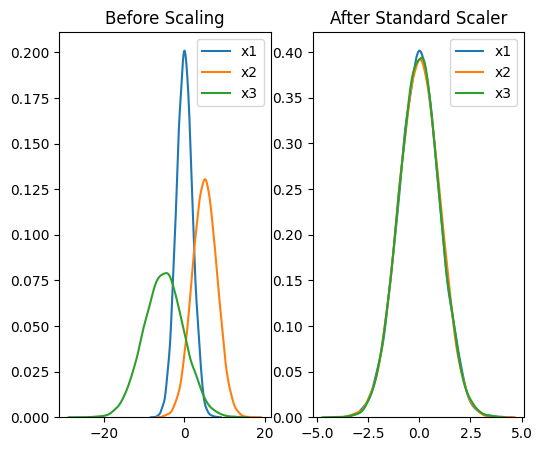

In [116]:
fig, ax = plt.subplots(ncols=2, figsize=(6, 5))

ax[0].set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax[0])
sns.kdeplot(df['x2'], ax=ax[0])
sns.kdeplot(df['x3'], ax=ax[0])


ax[1].set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax[1])
sns.kdeplot(scaled_df['x2'], ax=ax[1])
sns.kdeplot(scaled_df['x3'], ax=ax[1])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
# Get dataset
url="https://raw.githubusercontent.com/DatascienceBH/ML-Course/ML-github/data/california_housing_train.csv"

df = pd.read_csv(url)


In [ ]:
df.head()

In [ ]:
df.median_income.agg(["min", "max"])

In [ ]:
df.total_bedrooms.agg(["min", "max"])

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [76]:
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df.housing_median_age.agg(["min","max"])

In [ ]:
plt.xkcd()
plt.plot(df.housing_median_age)


In [ ]:
# possibilité de dimenssionner le gap
fig, ax = plt.subplots(1,2, figsize=(15, 6), sharex=True,  gridspec_kw={'wspace': .1})
fig.suptitle('Diff Scale Plot')
ax[0].plot(df.housing_median_age)
ax[0].set_title(" House Median Income")
ax[1].plot(df.median_house_value)
ax[1].set_title(" Median House Value")


In [ ]:
df.median_income.agg(["min", "max"])

In [ ]:
# remove xkcd
plt.rcdefaults()

f, ax = plt.subplots(1, 2, figsize=(15, 7), sharex=False)
sns.despine(left=True)

# Plot a filled kernel density estimate
sns.distplot(df.total_bedrooms, hist=True, color="g", kde_kws={"shade": True}, ax=ax[0])
sns.distplot(df.median_income, hist=True, color="r", kde_kws={"shade": True}, ax=ax[1])



# Normalized plot


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit_transform(df[["total_bedrooms"]])

- Standardizing tends to make the training process well behaved because the numerical condition of the optimization problems is improved.

In [ ]:
sns.distplot(scaler.fit_transform(df[["total_bedrooms"]]))

#   Normalization:  California Housing 

In [171]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

In [172]:
X, y =fetch_california_housing(return_X_y=True)

In [173]:
X[1:3]

array([[ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02]])

In [174]:
y[1:3]

array([3.585, 3.521])

In [175]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [176]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [177]:
fetch_california_housing().feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [178]:
df= pd.DataFrame(fetch_california_housing().data, 
             columns=fetch_california_housing().feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [179]:
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [180]:
df.MedInc.agg(["min", "max"])

min     0.4999
max    15.0001
Name: MedInc, dtype: float64

![](https://gisgeography.com/wp-content/uploads/2015/09/Horizontal-Datums-620x322.png)

In [181]:
df.Latitude.agg(["min", "max"])

min    32.54
max    41.95
Name: Latitude, dtype: float64

In [182]:
df.Longitude.agg(["min", "max"])

min   -124.35
max   -114.31
Name: Longitude, dtype: float64

In [183]:
df.Population.agg(["min", "max"])

min        3.0
max    35682.0
Name: Population, dtype: float64

In [184]:
df.MedInc.agg(["min", "max"])

min     0.4999
max    15.0001
Name: MedInc, dtype: float64

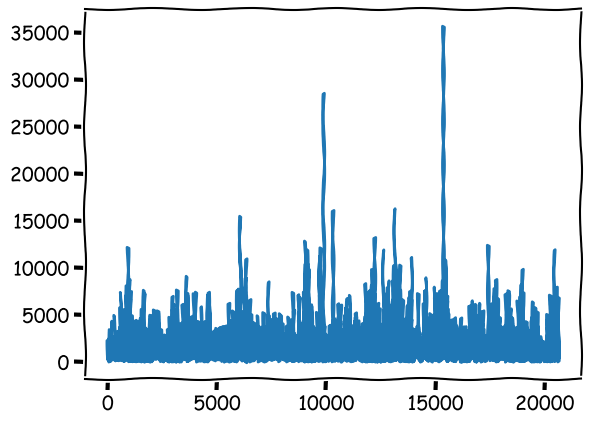

In [185]:
plt.xkcd()
plt.plot(df.Population)

In [186]:
def plot_N(A,t1,  B, t2):
    fig, ax = plt.subplots(1,2, figsize=(15, 6), sharex=True,  gridspec_kw={'wspace': .1})
    fig.suptitle('Diff Scale Plot')
    ax[0].plot(A)
    ax[0].set_title(" Zone Population")
    ax[1].plot(B)
    ax[1].set_title(" Median Income Value")

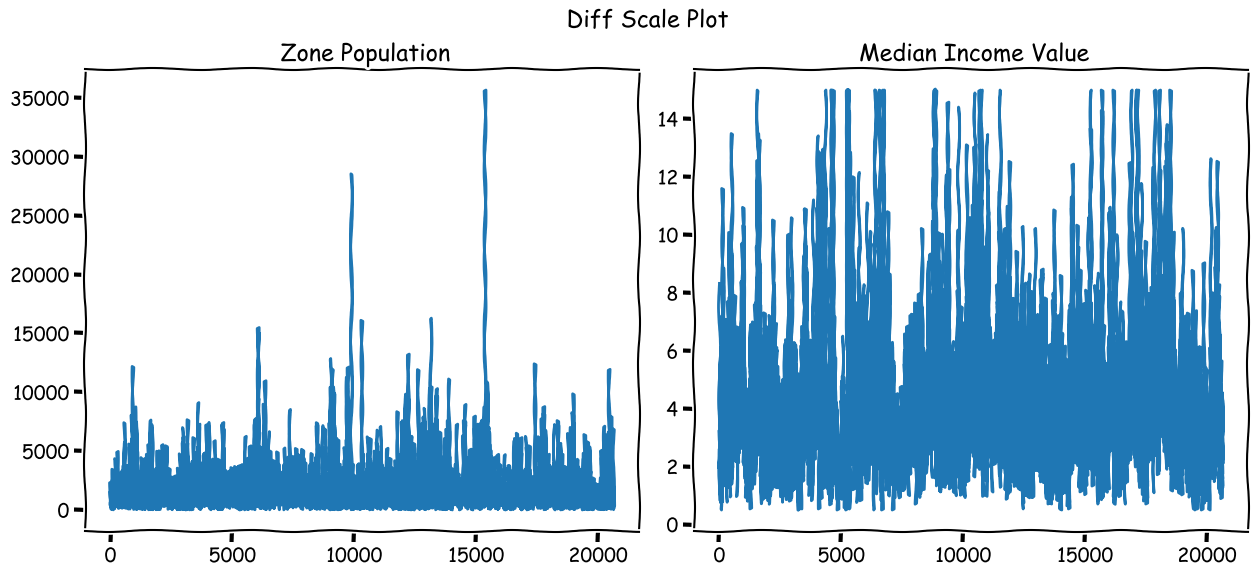

In [187]:
plot_N(df.Population,"Zone Population",  df.MedInc, "Median Income Value")

In [188]:
df.shape

(20640, 8)

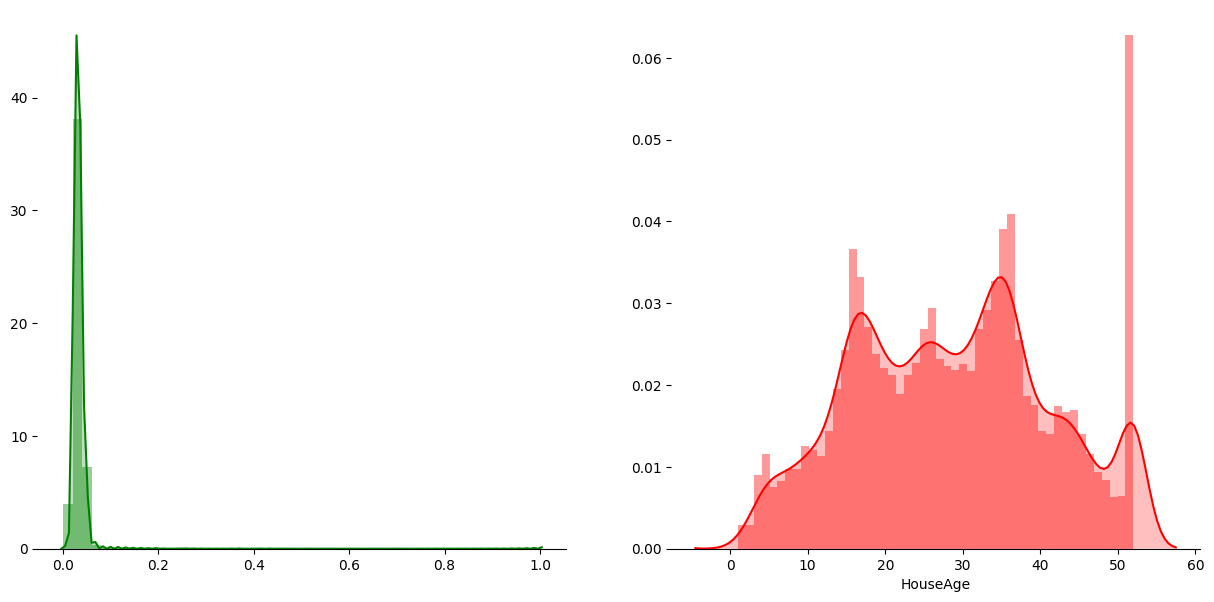

In [189]:
# remove xkcd
plt.rcdefaults()

from sklearn.preprocessing import MinMaxScaler

f, ax = plt.subplots(1, 2, figsize=(15, 7), sharex=False)
sns.despine(left=True)

# Plot a filled kernel density estimate
sns.distplot(MinMaxScaler().fit_transform(df[["AveRooms"]])
             ,hist=True, color="g", kde_kws={"shade": True}, 
             ax=ax[0], bins=50)
sns.distplot(df.HouseAge, hist=True, color="r", kde_kws={"shade": True}, ax=ax[1]
            ,bins=50)



In [190]:
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [191]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [192]:
df[["Longitude", "Latitude"]].agg(["min", "max"])

,Longitude,Latitude
min,-124.35,32.54
max,-114.31,41.95


In [193]:
np.linspace(32, 42, 5)

array([32. , 34.5, 37. , 39.5, 42. ])

In [194]:

# we Suppose that  the lattitude is representative of the house value 
#add a new column category : Position_Cat
category = pd.cut(df.Latitude,bins=np.linspace(32, 42, 5),
                  labels=['A','B','C','D'])
df.insert(6,'Cat_House',category)

In [197]:
df.sample(5, random_state=42)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Cat_House,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,B,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,B,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,C,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,A,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,B,36.62,-121.93


In [198]:
y.shape

(20640,)